# Text Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from gensim import parsing
import gensim

def text_preprocessing(path, file_dir):
  with open(path + file_dir, 'r') as f:
    text = f.read()
    stops = set(stopwords.words("english"))
    # Convert text to lower
    text = text.lower()
    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in stops]
    # Stemming
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
text = text_preprocessing(path, file_dir)
print(text[0:1000])

 harry potter and the sorcerer's stone 

chapter one 

the boy who lived 

mr. and mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much. they were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. 

mr. dursley was the director of a firm called grunnings, which made drills. he was a big, beefy man with hardly any neck, although he did have a very large mustache. mrs. dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. the dursleys had a small son called dudley and in their opinion there was no finer boy anywhere. 

the dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. they didn't think they could bear it if anyone found out about the potter

# Doc2vec


In [ ]:
chapters = []
paragraphs = []
sentences = []
words = []

chapter_cnt = 1
paragraph_cnt = 1
sentence_cnt = 0

with open(file_dir, 'r') as f:
  lines = f.readlines()
  
  for sentence in lines:
    sentence = gensim.utils.simple_preprocess(sentence)
    sentences.append(sentence_cnt)
    chapters.append(chapter_cnt)
    paragraphs.append(paragraph_cnt)
    words.append(sentence)
    
    if len(sentence) == 0:
      paragraph_cnt += 1
    
    elif len(sentence) == 2:
      if sentence[0] == "chapter":
        chapter_cnt += 1
    
    else:
      sentence_cnt += 1

In [ ]:
cnt = 0
with open(file_dir, 'r') as f:
  lines = f.readlines()
  for sentence_idx, sentence in enumerate(lines):
    word_idxs.append(sentence_idx)
    sentence = gensim.utils.simple_preprocess(sentence) # 6064
    for word_idx, word in enumerate(sentence):
      words.append(word)

In [ ]:
len(chapters)

6065

In [ ]:
len(sentences)

6065

In [ ]:
len(paragraphs)

6065

In [ ]:
df = pd.DataFrame({'chapter':[], 'paragraph':[], 'sentence':[], 'tokens':[]})
df.chapter = chapters
df.paragraph = paragraphs
df.sentence = sentences
df.tokens = words

In [ ]:
df

,chapter,paragraph,sentence,tokens
0,1,1,0,"[harry, potter, and, the, sorcerer, stone]"
1,1,1,1,[]
2,1,2,1,"[chapter, one]"
3,2,2,1,[]
4,2,3,1,"[the, boy, who, lived]"
...,...,...,...,...
6060,17,3031,2958,"[hope, you, have, er, good, holiday, said, her..."
6061,17,3031,2959,[]
6062,17,3032,2959,"[oh, will, said, harry, and, they, were, surpr..."
6063,17,3032,2960,[]


In [ ]:
import requests
import json
from google.cloud import language
from google.oauth2 import service_account
from google.cloud.language import enums
from google.cloud.language import types
# Build language API client (requires service account key)
client = language.LanguageServiceClient.from_service_account_json(path+'#####################.json')

In [ ]:
def analyze_sentiment(content):
    type_ = enums.Document.Type.PLAIN_TEXT
    document = {'type': type_, 'content': content}
    response = client.analyze_sentiment(document)
    sentiment = response.document_sentiment
    return sentiment.score, sentiment.magnitude

In [ ]:
text = 'I love python.'
get_sentiment_score(text)

0.8999999761581421

In [ ]:
sen_li = []
mag_li = []
cnt = 0
with open(file_dir, 'r') as f:
  texts = f.readlines()
  for idx in range(0, 1000):
    text = texts[idx]
    tokens = gensim.utils.simple_preprocess(text)
    if len(tokens)<5: # 2715 sentenced with more than 5 tokens
      sentiment = str(0)
      magnitude = str(0)
    else:
      sentiment, magnitude = analyze_sentiment(text)
    sen_li.append(sentiment)
    mag_li.append(magnitude)

In [ ]:
sen1000 = sen_li
mag1000 = mag_li

In [ ]:
sen_li

In [ ]:
#sen_2000 = sentiment_li+sentiment_li_1000_2000
#mag_2000 = maginitude_li +maginitude_li_1000_2000

In [ ]:
sen_3000 = sen_2000+sentiment_li
mag_3000 = mag_2000+magnitude_li

In [ ]:
len(sen_4000)

4000

In [ ]:
len(mag_4000)

4000

In [ ]:
sen_4000 = sen_3000+sentiment_li
mag_4000 = mag_3000+magnitude_li

In [ ]:
sen_5000 = sen_4000+sentiment_li
mag_5000 = mag_4000+magnitude_li

In [ ]:
sen_6000 = sen_5000+sentiment_li
mag_6000 = mag_5000+magnitude_li

In [ ]:
len(sen_6000)

6065

In [ ]:
len(mag_6000)

6065

In [ ]:
df1 = pd.DataFrame({"sentiment":[], "magnitude":[]})
df1.sentiment = sen_6000
df1.magnitude = mag_6000

In [ ]:
df2 = pd.concat([df, df1], axis=1)
df2

,chapter,paragraph,sentence,tokens,sentiment,magnitude
0,1,1,0,"[harry, potter, and, the, sorcerer, stone]",0.4,0.4
1,1,1,1,[],0,0
2,1,2,1,"[chapter, one]",0,0
3,2,2,1,[],0,0
4,2,3,1,"[the, boy, who, lived]",0,0
...,...,...,...,...,...,...
6060,17,3031,2958,"[hope, you, have, er, good, holiday, said, her...",-0.6,0.6
6061,17,3031,2959,[],0,0
6062,17,3032,2959,"[oh, will, said, harry, and, they, were, surpr...",0.1,1.9
6063,17,3032,2960,[],0,0


In [ ]:
type(sen_6000)

list

In [ ]:
df2.to_excel(path+"sentiment_analysis.xlsx") 

In [ ]:
df2

,chapter,paragraph,sentence,tokens,sentiment,magnitude
0,1,1,0,"[harry, potter, and, the, sorcerer, stone]",0.4,0.4
1,1,1,1,[],0,0
2,1,2,1,"[chapter, one]",0,0
3,2,2,1,[],0,0
4,2,3,1,"[the, boy, who, lived]",0,0
...,...,...,...,...,...,...
6060,17,3031,2958,"[hope, you, have, er, good, holiday, said, her...",-0.6,0.6
6061,17,3031,2959,[],0,0
6062,17,3032,2959,"[oh, will, said, harry, and, they, were, surpr...",0.1,1.9
6063,17,3032,2960,[],0,0


In [ ]:
df2['token_cnt']=df2['tokens'].str.len()
df2['chapter'] = df2['chapter']-1

In [ ]:
df3 = df2[df2.sentiment != '0']
#df3 = df3.drop_duplicates['paragraph']
df3

,chapter,paragraph,sentence,tokens,sentiment,magnitude
0,1,1,0,"[harry, potter, and, the, sorcerer, stone]",0.4,0.4
6,2,4,2,"[mr, and, mrs, dursley, of, number, four, priv...",0,1.7
8,2,5,3,"[mr, dursley, was, the, director, of, firm, ca...",0,0.6
10,2,6,4,"[the, dursleys, had, everything, they, wanted,...",0,2.6
12,2,7,5,"[when, mr, and, mrs, dursley, woke, up, on, th...",0.1,1.1
...,...,...,...,...,...,...
6054,17,3028,2955,"[in, manner, of, speaking, said, uncle, vernon...",-0.3,1
6056,17,3029,2956,"[harry, hung, back, for, last, word, with, ron...",-0.1,0.1
6058,17,3030,2957,"[see, you, over, the, summer, then]",0.3,0.3
6060,17,3031,2958,"[hope, you, have, er, good, holiday, said, her...",-0.6,0.6


In [ ]:
#df3.to_excel(path+"sentiment_analysis_trimmed.xlsx") 
df3 = pd.read_excel(path+"sentiment_analysis_trimmed.xlsx")

In [ ]:
def smoothListGaussian(list, degree=100):
    window = degree*2-1
    weight = numpy.array([1.0]*window)
    weightGauss = []
    for i in range(window):
        i = i-degree+1
        frac = i/float(window)
        gauss = 1/(numpy.exp((4*(frac))**2))
        weightGauss.append(gauss)
    weight = numpy.array(weightGauss)*weight
    smoothed = [0.0]*(len(list)-window)
    for i in range(len(smoothed)):
        smoothed[i] = sum(numpy.array(list[i:i+window])*weight)/sum(weight)
    return smoothed 

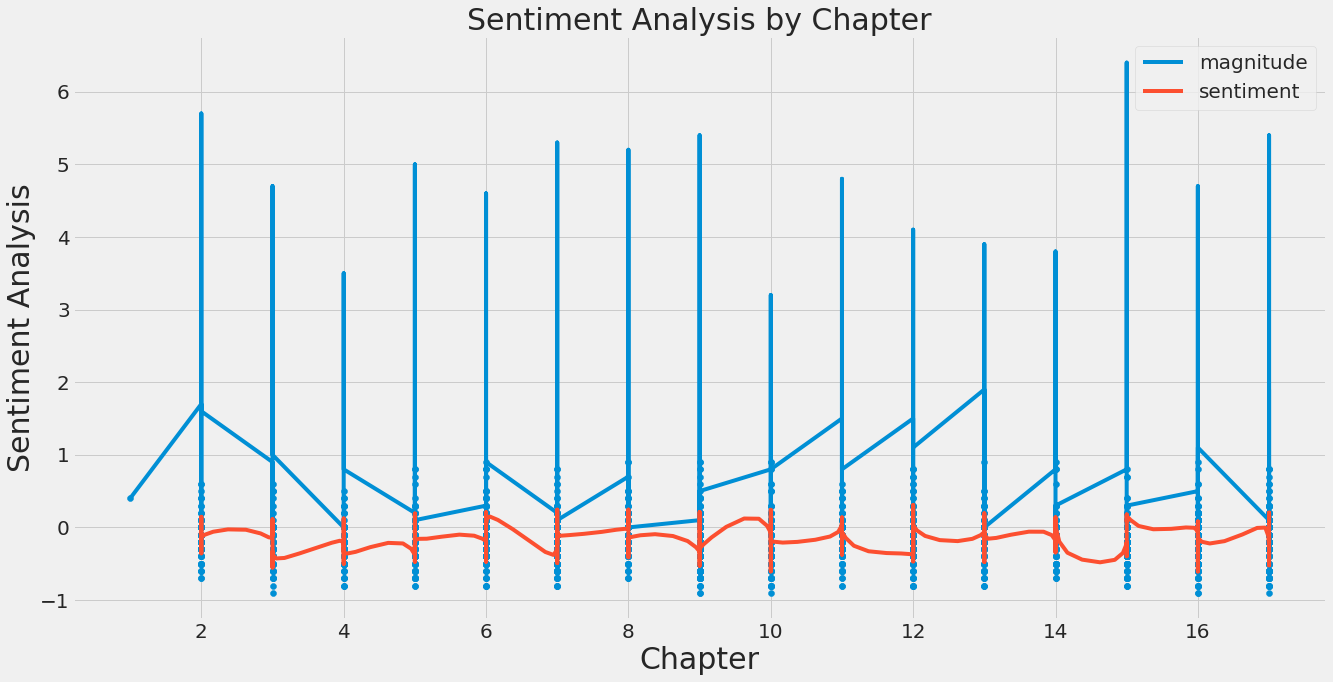

In [ ]:
import matplotlib.pyplot as plt
import numpy
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
plt.title("Sentiment Analysis by Chapter", fontsize=30)
plt.ylabel('Sentiment Analysis', fontsize=30)
plt.xlabel('Chapter', fontsize=30)
plt.scatter(df3.chapter, df3.sentiment)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
y = smoothListGaussian(df3.sentiment)
x = smoothListGaussian(df3.chapter)

plt.plot(df3.chapter, df3.magnitude, label='magnitude')
plt.plot(x, y, label='sentiment')
plt.legend(loc='best', fontsize=20)
plt.savefig(path+'Sentiment Analysis by Chapter.png')

# Sentiment score by sentence

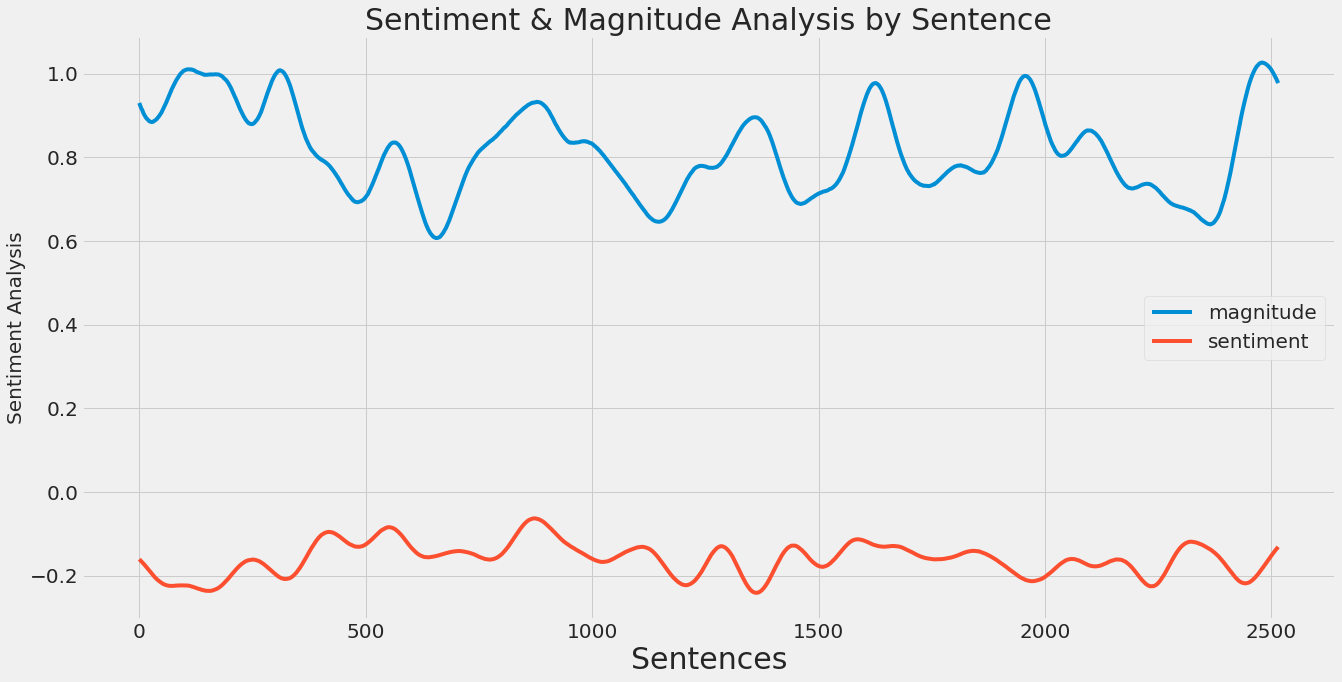

In [ ]:
plt.figure(figsize=(20,10))
x = smoothListGaussian(df3.magnitude)
y = smoothListGaussian(df3.sentiment)

plt.title("Sentiment & Magnitude Analysis by Sentence", fontsize=30)
plt.ylabel('Sentiment Analysis', fontsize=20)
plt.xlabel('Sentences', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x, label='magnitude')
plt.plot(y, label='sentiment')
plt.legend(loc='best', fontsize=20)
plt.savefig(path+'Sentiment & Magnitude Analysis by Sentence.png')

In [ ]:
df3['magnitude']

0       0.4
1       1.7
2       0.6
3       2.6
4       1.1
       ... 
2710    1.0
2711    0.1
2712    0.3
2713    0.6
2714    1.9
Name: magnitude, Length: 2715, dtype: float64

In [ ]:
# from scipy.fft import fft, ifft
# from scipy import signal
# import numpy as np

# plt.figure(figsize=(20,10))
# mag = fft(df3['magnitude'])
# mag = smoothListGaussian(mag)
# sen = fft(df3.sentiment)
# sen = smoothListGaussian(sen)
# plt.title("Sentiment and Magnitude Scores (Fourier)", fontsize=30)
# plt.ylabel('Sentiment & Maginitue Scores', fontsize=20)
# plt.xlabel('Sentence', fontsize=30)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.plot(mag, label='Magnitude')
# plt.plot(sen, label='Sentiment Score')
# plt.legend(loc="best", fontsize=20)
# plt.savefig(path+'Sentiment and Magnitude Scores (Fourier).png')

#  Load df for Entitity Analysis

In [ ]:
dataframe = pd.read_excel(path+"sentiment_analysis_trimmed.xlsx")

In [ ]:
import json
from google.cloud import language_v1
from google.cloud.language_v1 import enums
import requests
import json
from google.cloud import language
from google.oauth2 import service_account
from google.cloud.language import enums
from google.cloud.language import types
# Build language API client (requires service account key)
client = language.LanguageServiceClient.from_service_account_json(path+'##################.json')

entity_name = []
entity_type = []
salience = []
sentiment_score = []
sentiment_magnitude = []

def sample_analyze_entity_sentiment(text_content):

    # harry_senti_score = 0
    # harry_magnitude = 0
    # harry_salience = 0
    type_ = enums.Document.Type.PLAIN_TEXT
    language = "en"
    document = {"content": text_content, "type": type_, "language": language}

    # Available values: NONE, UTF8, UTF16, UTF32
    encoding_type = enums.EncodingType.UTF8

    response = client.analyze_entity_sentiment(document, encoding_type=encoding_type)
    # Loop through entitites returned from the API
    for entity in response.entities:
      # if entity.name == 'harry' or entity.name == 'potter':
      #   sentiment = entity.sentiment
      #   harry_senti_score += sentiment.score
      #   harry_magnitude += sentiment.magnitude

      #   return harry_senti_score, harry_magnitude
      entity_name.append(entity.name)
      entity_type.append(enums.Entity.Type(entity.type).name)
      salience.append(entity.salience)
      sentiment = entity.sentiment
      sentiment_score.append(sentiment.score)
      sentiment_magnitude.append(sentiment.magnitude)

        # print(u"Representative name for the entity: {}".format(entity.name))
        # #Get entity type, e.g. PERSON, LOCATION, ADDRESS, NUMBER, et al
        # print(u"Entity type: {}".format(enums.Entity.Type(entity.type).name))
        # #Get the salience score associated with the entity in the [0, 1.0] range
        # print(u"Salience score: {}".format(entity.salience))
        # #Get the aggregate sentiment expressed for this entity in the provided document.
        # sentiment = entity.sentiment
        # print(u"Entity sentiment score: {}".format(sentiment.score))
        # print(u"Entity sentiment magnitude: {}".format(sentiment.magnitude))
        
        # with open(path+"entitiy_info.json", "w") as fp:
        #   json.dump(data, fp, indent=4)
      #  Loop over the metadata associated with entity. For many known entities,
      #   the metadata is a Wikipedia URL (wikipedia_url) and Knowledge Graph MID (mid).
      #   Some entity types may have additional metadata, e.g. ADDRESS entities
      #   may have metadata for the address street_name, postal_code, et al.
      #   for metadata_name, metadata_value in entity.metadata.items():
      #     print(u"{} = {}".format(metadata_name, metadata_value))

        #Loop over the mentions of this entity in the input document.
        #The API currently supports proper noun mentions.
        # for mention in entity.mentions:
        #    print(u"Mention text: {}".format(mention.text.content))
        #     #Get the mention type, e.g. PROPER for proper noun
        #    print(
        #        u"Mention type: {}".format(enums.EntityMention.Type(mention.type).name)
        #    )

    # Get the language of the text, which will be the same as
    # the language specified in the request or, if not specified,
    # the automatically-detected language.
    #print(u"Language of the text: {}".format(response.language))

In [ ]:
for texts in dataframe.tokens:
    sample_analyze_entity_sentiment(texts)

In [ ]:
entity_df = pd.DataFrame({"name": [], "type": [], "salience": [], "sentiment_score":[], "sentiment_magnitude":[]})

In [ ]:
entity_df['name'] = entity_name
entity_df['type'] = entity_type
entity_df['salience'] = salience
entity_df['sentiment_score'] = sentiment_score
entity_df['sentiment_magnitude'] = sentiment_magnitude

In [ ]:
len(salience)

17196

In [ ]:
len(sentiment_magnitude)

17196

In [ ]:
entity_df.loc[entity_df['name'] =='harry'].mean()

salience               0.249638
sentiment_score       -0.127864
sentiment_magnitude    0.175711
dtype: float64

In [ ]:
proper_nouns = ['dudley', 'dumbledore', 'mcgonagall', 'voldemort', 'potter', 'harry', 'hagrid',
                'ron', 'weasley', 'hermione', 'draco', 'malfoy', 'snape']
entity_df.name = entitiy_df.name.replace('potter', 'harry')
entity_df.name = entity_df.name.replace('draco', 'malfoy')
entity_df.name = entity_df.name.replace('weasley', 'ron')

In [ ]:
entity_df

,name,type,salience,sentiment_score,sentiment_magnitude
0,harry,OTHER,0.622594,0.0,0.0
1,harry,OTHER,0.304206,0.0,0.0
2,sorcerer,PERSON,0.073200,0.0,0.0
3,number,OTHER,0.195394,0.1,0.1
4,mr,PERSON,0.195394,0.0,0.0
...,...,...,...,...,...
17191,grin,OTHER,0.145377,0.1,0.1
17192,use,OTHER,0.038791,0.0,0.0
17193,magic,OTHER,0.038791,0.2,0.2
17194,home,LOCATION,0.038791,0.0,0.0


In [ ]:
character_df = entity_df[entity_df['name'].isin(proper_nouns)]
character_df
character_df.groupby('name')['salience'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
dudley,108.0,0.186248,0.250899,0.002200,0.026116,0.066933,0.266505,1.000000
dumbledore,156.0,0.264644,0.261571,0.002254,0.050217,0.176595,0.393154,1.000000
hagrid,345.0,0.241296,0.251950,0.001480,0.063450,0.141212,0.330125,1.000000
harry,1324.0,0.248990,0.252308,0.002270,0.054430,0.155009,0.373521,1.000000
hermione,221.0,0.256212,0.255616,0.007511,0.069415,0.157447,0.348948,1.000000
malfoy,128.0,0.208830,0.240245,0.003030,0.050546,0.116109,0.277737,1.000000
mcgonagall,98.0,0.304647,0.238790,0.004281,0.124662,0.254879,0.415692,1.000000
ron,438.0,0.292619,0.279663,0.000957,0.061051,0.195160,0.448703,1.000000
snape,163.0,0.161425,0.200260,0.002442,0.036556,0.078188,0.196145,1.000000


In [ ]:
#entity_df.loc[entity_df['type'] == 'PERSON']['name'].unique()

In [ ]:
entitiy_df.to_excel(path+"entity_analysis_result.xlsx")
character_df.to_excel(path+"charcter_analysis_result.xlsx")

In [ ]:
summary_df = character_df.groupby('name').describe()

In [ ]:
# summary_df = summary_df.unstack(level=0)
summary_df.index

Index(['dudley', 'dumbledore', 'hagrid', 'harry', 'hermione', 'malfoy',
       'mcgonagall', 'ron', 'snape', 'voldemort'],
      dtype='object', name='name')

In [ ]:
summary_df.to_excel(path+"character_summary_df.xlsx")

In [ ]:
pivot = pd.pivot_table(character_df, index = 'name', values = ['salience', 'sentiment_score', 'sentiment_magnitude'])

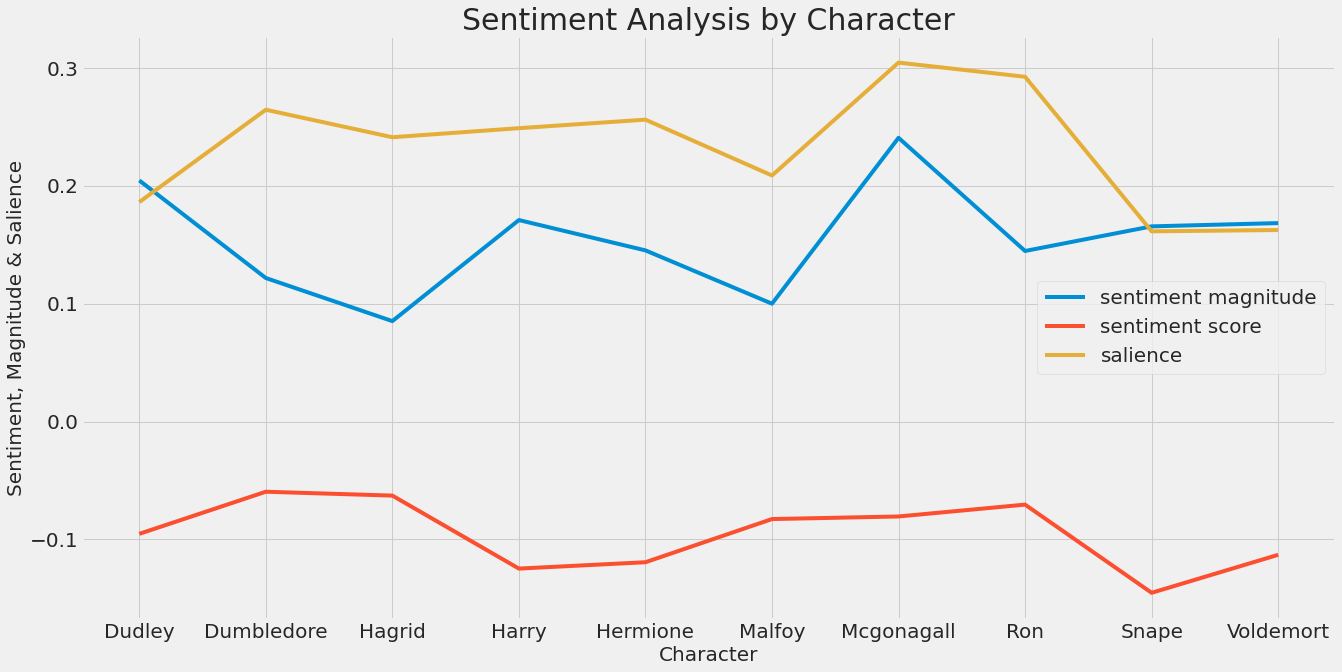

In [ ]:
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
plt.title("Sentiment Analysis by Character", fontsize=30)
plt.ylabel('Sentiment, Magnitude & Salience', fontsize=20)
plt.xlabel('Character', fontsize=20)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)

plt.plot(pivot.index.str.title(), pivot['sentiment_magnitude'], label='sentiment magnitude')
plt.plot(pivot.index.str.title(), pivot['sentiment_score'], label='sentiment score')
plt.plot(pivot.index.str.title(), pivot['salience'], label='salience')

plt.legend(loc='best', fontsize=20)
plt.savefig(path+'Sentiment Analysis by Character.png')